In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3


rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

#import mplhep as hep
#hep.set_style(hep.style.ROOT)

In [3]:
#
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [4]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

plot_style_1A = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': False
}

plot_style_2A = {'alpha': 0.5, 'density': False}


In [5]:
def get_Dataframe(path, name='Data', tag=None):
    Files = listdir(path) 
    #print (Files)
    df = None
    for f in Files:
        if name not in f: continue
        filename = path+f
        if not(tag is None) and (tag not in f): continue
        print ('filename is' , filename)
        
        temp_file = uproot3.open(filename)
        
        hasTree = False 
        
        print (temp_file.keys()) 
        
        if(len(temp_file.keys())<1):
            print('could not find %s, skipping'%name)
            continue
        
        if( not(name in str(temp_file.keys()[0]))):
            print('could not find %s, skipping'%name)
            continue
        
        for key in temp_file[name].keys():
            #print (key)
            if('minitree' in str(key)):
                hasTree=True
        if (not hasTree):
            print('file has not minitree, skipping')
            continue

        temp_tree = temp_file[name+'/minitree']

        
        temp_df = None
        
        if 'Data' not in name:
            try:
                temp_df   =  temp_tree.pandas.df(["Q2","gen_Q2","y",'gen_y', 'tau*', 'gen_tau*','wgt'], entrystop=3e6,flatten=True)
                df = pd.concat([df,temp_df])
            except ValueError:
                print ('oops, there is a problem in flattening the TTree ')
        else:
            try:
                temp_df   =  temp_tree.pandas.df(["Q2","y","tau*",'wgt'], entrystop=3e6,flatten=True) 
                df = pd.concat([df,temp_df])
            except ValueError:
                print ('oops, there is a problem in flattening the TTree ')
        
        #try:
        #    df.shape[0]
        #except ValueError:
        #    print('no valid dataframe')
    print('####################################################################')
    print('Dataframe has a total of ', df.shape[0], ' entries')
    print('####################################################################')

    return df


In [6]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [7]:
def applyCutsJets(df,isMC=False):
    temp = df

    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('Q = sqrt(Q2)', inplace=True)
    temp = applyCut(temp, 'pass_reco==0 | 0.08 < y < 0.7', '0.08 < y < 0.7')
    temp = applyCut(temp, 'pass_reco==0 | Q2>150', 'Q2>150')

    if(isMC):
        temp.eval('gen_logQ2= log(gen_Q2)/2.3025850', inplace=True)   
        temp.eval('gen_Q    = sqrt(gen_Q2)', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## Get dataframes, apply selection

In [8]:
mc_name = 'Django'
altmc_name = 'Rapgap'
mc_tag = 'nominal' ##could be "sys_0 or sys_1, etc"
data_tag  = 'nominal'
period = 'ep0607'
#altmc_name = 'Rapgap'
#mc_name = 'Django'

In [9]:
#path= '/data0/users/marratia/HERAdata/21-01-06-00-34-test17/out_ep0304/'
#path = '/data0/users/marratia/HERAdata/out_ep0607/'
path = '/home/miguel/out_ep0607/'
data = get_Dataframe(path, name='Data', tag=data_tag)

filename is /home/miguel/out_ep0607/Data_Eplus0607_0.nominal.root
[b'Data;1']
filename is /home/miguel/out_ep0607/Data_Eplus0607_2.nominal.root
[b'Data;1']
filename is /home/miguel/out_ep0607/Data_Eplus0607_3.nominal.root
[b'Data;1']
####################################################################
Dataframe has a total of  269413  entries
####################################################################


In [11]:
%%time 
mc = get_Dataframe(path, name=mc_name, tag=mc_tag)


filename is /home/miguel/out_ep0607/Django_Eplus0607_129.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_134.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_13.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_7.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_3.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_2.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_103.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_113.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_141.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_125.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_152.nominal.root
[b'Django;1']
filename is /home/miguel/out_ep0607/Django_Eplus0607_17.nominal.root
[b'Django;1']


In [10]:
%%time 

altmc = get_Dataframe(path, name=altmc_name, tag=mc_tag)


filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_131.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_136.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_144.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_150.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_115.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_105.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_142.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_137.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_122.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_108.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_106.nominal.root
[b'Rapgap;1']
filename is /home/miguel/out_ep0607/Rapgap_Eplus0607_3.nominal.root
[b'Rapga

## Defining pass reco and pass truth variables

In [12]:
mc['pass_reco'] = np.where(mc['Q2']>0, 1, 0)
mc['pass_truth'] = np.where(mc['Q2']>0, 1, 0)
altmc['pass_reco'] = np.where(altmc['Q2']>0, 1, 0)
altmc['pass_truth'] = np.where(altmc['Q2']>0, 1, 0)
data['pass_reco'] = np.where(data['Q2']>0, 1, 0)

In [13]:
mc.keys()

Index(['Q2', 'gen_Q2', 'y', 'gen_y', 'tau1b', 'tauzQ', 'gen_tau1b',
       'gen_tauzQ', 'wgt', 'pass_reco', 'pass_truth'],
      dtype='object')

## Event selection

In [14]:
print('Selecting data events\n')
data = applyCutsJets(data)
print('Selecting MC events\n')
mc   = applyCutsJets(mc, isMC=True)
print('alt mc\n')
altmc = applyCutsJets(altmc, isMC=True)

Selecting data events

0.08 < y < 0.7 195275  fraction kept: 72.5
Q2>150 163350  fraction kept: 83.7
Selecting MC events

0.08 < y < 0.7 44411876  fraction kept: 96.9
Q2>150 42796481  fraction kept: 96.4
alt mc

0.08 < y < 0.7 31742201  fraction kept: 96.7
Q2>150 30584555  fraction kept: 96.4


In [15]:
label_DISselection = r'$Q^{2}>150$ GeV$^{2}, 0.08<y<0.7$'

In [16]:
mc.head()

,Q2,gen_Q2,y,gen_y,tau1b,tauzQ,gen_tau1b,gen_tauzQ,wgt,pass_reco,pass_truth,logQ2,Q,gen_logQ2,gen_Q
entry,,,,,,,,,,,,,,,
0,0.000000,178.031616,0.000000,0.015276,0.0,0.0,0.0,0.0,0.096003,0,0,-inf,0.000000,2.250497,13.342849
1,0.000000,205.839920,0.000000,0.882391,0.0,0.0,0.0,0.0,0.008617,0,0,-inf,0.000000,2.313530,14.347122
2,0.000000,76.335831,0.000000,0.168026,0.0,0.0,0.0,0.0,0.094678,0,0,-inf,0.000000,1.882729,8.737038
3,1435.223755,1494.162476,0.292941,0.337828,-9.0,-9.0,0.0,0.0,0.008617,1,1,3.15692,37.884346,3.174398,38.654396
4,0.000000,79.384888,0.000000,0.080207,0.0,0.0,0.0,0.0,0.102111,0,0,-inf,0.000000,1.899738,8.909820


## Plot a few distributions at reco and truth level 

In [ ]:
plt.hist(mc.query('pass_reco==1')['y'],weights = mc.query('pass_reco==1')['wgt'], range=(0,1),bins=100,**plot_style_1)
plt.hist(data['y'],range=(0,1),bins=100, **plot_style_2)
plt.show()

In [ ]:
plt.hist(mc['gen_y'],weights = mc['wgt'],range=(0,1),bins=100,**plot_style_1)
plt.hist(altmc['gen_y'],weights = altmc['wgt'],range=(0,1),bins=100,**plot_style_1)
plt.hist(altmc.query('pass_reco==1')['y'],weights = altmc.query('pass_reco==1')['wgt'],range=(0,1),bins=100,**plot_style_1)

plt.show()


In [ ]:
altmc_cut = altmc.query('pass_reco==1')

In [ ]:
mc_cut = mc[:2000000]
altmc_cut = altmc_cut[:200000]


In [ ]:
print(len(data))
print(len(mc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(mc_cut)) ##only what is really reconstructed counts
print(len(altmc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(altmc_cut)) ##only what is really reconstructed counts


## Define features using just MC and alt MC *this is CLOSURE TEST*

In [ ]:
mc_cut.keys()

In [ ]:
Q_0_G       = mc_cut['gen_Q']
Q_0_S       = mc_cut['Q']
Q_unknown_G = altmc_cut['gen_Q']
Q_unknown_S = altmc_cut['Q']


y_0_G       = mc_cut['gen_y']
y_0_S       = mc_cut['y']
y_unknown_G = altmc_cut['gen_y']
y_unknown_S = altmc_cut['y']

weight_MC = mc_cut['wgt']

# tauzQ_0_G       = mc_cut['gen_tauzQ']
# tauzQ_0_S       = mc_cut['tauzQ']
# tauzQ_unknown_G = altmc_cut['gen_tauzQ']
# tauzQ_unknown_S = altmc_cut['tauzQ']

In [ ]:
theta0_G=np.c_[(Q_0_G,y_0_G)]
theta0_S=np.c_[(Q_0_S,y_0_S)]
theta_unknown_G=np.c_[(Q_unknown_G,y_unknown_G)]
theta_unknown_S=np.c_[(Q_unknown_S,y_unknown_S)]


In [ ]:
pass_reco = np.array(mc_cut['pass_reco'])
pass_truth = np.array(mc_cut['pass_truth'])
theta0_S[:,0][pass_reco==0] = -10
theta0_G[:,0][pass_truth==0] = -10

## Show input for closure test (i.e. synthetic and natural datasets using mc and altmc)

In [ ]:
bins = np.linspace(0,50, 101)
fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)

ax[0].set_xlabel('$x_0$')
ax[0].set_ylabel('Events per bin (normalized)')
ax[0].hist(theta0_G[theta0_G[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Generation')
ax[0].hist(theta0_S[theta0_S[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Simulation')
legend = ax[0].legend(
    loc='best',
    frameon=True)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel('$x_0$')

ax[1].hist(theta_unknown_G[theta_unknown_S[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Gen.')
legend = ax[1].legend(
    loc='best',
    frameon=True)


ax[1].hist(theta_unknown_S[theta_unknown_S[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Detector')
legend = ax[1].legend(
    loc='best',
    frameon=True)
plt.setp(legend.get_title(), multialignment='center')

fig.show()

bins = np.linspace(0,1, 101)
#bins = np.linspace(0,2, 101)
#bins = np.linspace(0,1,100)
fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)

ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('Events per bin (normalized)')
ax[0].hist(theta0_G[theta0_G[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Generation')
ax[0].hist(theta0_S[theta0_S[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Simulation')
legend = ax[0].legend(
    loc='best',
    frameon=True)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel('$x_1$')

ax[1].hist(theta_unknown_G[theta_unknown_S[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Gen.')
legend = ax[1].legend(
    loc='best',
    frameon=True)

ax[1].hist(theta_unknown_S[theta_unknown_S[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Detector')
legend = ax[1].legend(
    loc='best',
    frameon=True)






plt.setp(legend.get_title(), multialignment='center')

fig.show()

## Define Multifold 

In [17]:
from __future__ import absolute_import, division, print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Input multiple observables as tuple or list (i.e. theta0_G = (obs_1, obs_2, ...))
"""    Arguments:
        num_observables: number of observables to 
                            simultaneously unfold (integer)
                            
        iterations: number of iterations (integer)
        
        theta0_G: tuple or list of nominal 
                    generation-level observables as Numpy arrays
                    
        theta0_S: tuple or list of nominal 
                    simulation-level observables as Numpy arrays
                    
        theta_unknown_S: tuple or list of "natural" 
                            (unknown) simulation-level observables 
                            to be unfolded as Numpy arrays
        
        Returns:
        - A Numpy array of weights to reweight distributions in 
        theta0_G to the unfolded distribution of theta_unknown_S
        
        - The model used to calculate those weights
"""
# Binary crossentropy for classifying two samples with weights
# Weights are "hidden" by zipping in y_true (the labels)

def weighted_binary_crossentropy(y_true, y_pred):
    weights = tf.gather(y_true, [1], axis=1) # event weights
    y_true = tf.gather(y_true, [0], axis=1) # actual y_true for loss
    
    # Clip the prediction value to prevent NaN's and Inf's
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

    t_loss = -weights * ((y_true) * K.log(y_pred) +
                         (1 - y_true) * K.log(1 - y_pred))
    
    return K.mean(t_loss)

def multifold(num_observables, iterations, theta0_G, theta0_S,
              theta_unknown_S,weight_MC, verbose=1):
    
    theta0 = np.stack([theta0_G, theta0_S], axis=1)
    labels0 = np.zeros(len(theta0))
    theta_unknown = np.stack([theta_unknown_S, theta_unknown_S], axis=1)
    labels1 = np.ones(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))
    
    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))
    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels1))

    weights = np.empty(shape=(iterations, 2, len(theta0_G)))

    inputs = Input((num_observables, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=inputs, outputs=outputs)

    earlystopping = EarlyStopping(patience=10,
                              verbose=verbose,
                              restore_best_weights=True)
    

    # from NN (DCTR) 
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(np.nan_to_num(weights))
    
    
    
    weights_pull = weight_MC #np.ones(len(sim_reco))
    weights_push = weight_MC# np.ones(len(sim_reco))
    
#     weights_pull = np.ones(len(theta0_S))
#     weights_push = np.ones(len(theta0_S))
    
    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))
        print("STEP 1\n")

        
        weights_1 = np.concatenate((weights_push, np.ones(len(theta_unknown_S))))

        
        
      
        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
        xvals_1, yvals_1, weights_1)
        
        Y_train_1 = np.stack((Y_train_1, w_train_1), axis=1)
        Y_test_1 = np.stack((Y_test_1, w_test_1), axis=1)
            
            
        batch_size=10000
        model.compile(loss=weighted_binary_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
        model.fit(X_train_1,
              Y_train_1,
              epochs=200,
              batch_size=batch_size,
              validation_data=(X_test_1, Y_test_1),
              callbacks=[earlystopping],
              verbose=verbose)

       
        weights_pull = weights_push * reweight(theta0_S)
        weights_pull[theta0_S[:,0]==-10] = 1
        weights[i, :1, :] = weights_pull
        
        print("\nSTEP 2\n")

        weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for MC Truth (not MC weights), actual weights for (reweighted) MC Truth

        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)
    
        # zip ("hide") the weights with the labels
        Y_train_2 = np.stack((Y_train_2, w_train_2), axis=1)
        Y_test_2 = np.stack((Y_test_2, w_test_2), axis=1)

        model.compile(loss=weighted_binary_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
        model.fit(X_train_2,
              Y_train_2,
              epochs=200,
              batch_size=batch_size,
              validation_data=(X_test_2, Y_test_2),
              callbacks=[earlystopping],
              verbose=1)

        weights_push = weight_MC*reweight(theta0_G)
        weights[i, 1:2, :] = weights_push
   
    return weights, model

## Unfold

In [ ]:
K.clear_session()

In [ ]:
%%time 
iterations = 3# use ~4 iterations
num_observables= 2

weights, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=theta0_G,
                       theta0_S=theta0_S,
                       theta_unknown_S= theta_unknown_S,weight_MC=weight_MC, verbose=1)

## Put weights into MC dataframe

In [ ]:
mc_cut['weight_reco'] = weights[-1, 0, :]
mc_cut['weight_truth'] = weights[-1, 1, :]

## Check that weights are reasonable

In [ ]:
plt.hist(np.log10(mc_cut['weight_truth']),bins=100,**plot_style_2,label='Weight truth')
plt.hist(np.log10(mc_cut['weight_reco']),bins=100,**plot_style_2, label='Weight reco')
plt.legend()
plt.xlabel('Log 10 weight truth')
plt.yscale('log')
plt.show()

for i in range(len(weights)):
    print(max(weights[i, 1, :]))
    print(min(weights[i, 1, :]))
    print(max(weights[i, 0, :]))
    print(min(weights[i, 0, :]))
    print(' ')

## Remove some large weights 

In [ ]:
# print(len(mc_cut))
# mc_cut.query('weight_truth>10000')
# print(len(mc_cut.query(' weight_reco>0.01')))

# mc_cut = mc_cut.query('weight_reco<100 and weight_reco>0.01')
# #altmc_cut = altmc_cut.query('weight_truth<10000')
# print(len(mc_cut))

# mc_cut = mc_cut.query('weight_truth<100 and weight_truth>0.01')
# print(len(mc_cut))

## Closure Test

In [ ]:
event_selection = 'gen_y>0.2 and gen_y<0.7 and gen_Q2>150'
#track_selection = 'gen_track_pt>0.2'
query = 'pass_reco==1 and ' + event_selection
print('The query is:' , query)

label1 = mc_name +' truth'
label2 = altmc_name + ' unfold.'
label3 = altmc_name + ' truth '


for i in range(len(weights)):
    if(i<2): continue
    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           3,
                           figsize=(24, 6),
                           constrained_layout=True)
    
    ax = ax.flatten()
    
    bins = np.linspace(0.0, 1.0,40 )

    ax[0].set_xlabel(r'$y$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(mc_cut.query(query)['gen_y'], bins=bins, label=label1, **plot_style_2)
    ax[0].hist(mc_cut.query(query)['gen_y'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[0].hist(altmc_cut.query(query)['gen_y'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    ax[0].legend(frameon=False)

    bins = np.linspace(2, 5,50 )

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(mc_cut.query(query)['gen_logQ2'], bins=bins, label=label1, **plot_style_2)
    ax[1].hist(mc_cut.query(query)['gen_logQ2'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[1].hist(altmc_cut.query(query)['gen_logQ2'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    ax[1].legend(frameon=False)

    

    bins = np.linspace(0,1,50 )

    ax[2].set_xlabel(r' $\tau$',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(mc_cut.query(query)['gen_tauzQ'], bins=bins, label=label1, **plot_style_2)
    ax[2].hist(mc_cut.query(query)['gen_tauzQ'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[2].hist(altmc_cut.query(query)['gen_tauzQ'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    ax[2].legend(frameon=False)



## Show the reweighting of the reco

In [ ]:
query = 'pass_reco==1 '
print('The query is:' , query)
label1 = mc_name +' reco'
label2 = mc_name +' wgt.'
label3 = altmc_name +' reco'

color1='blueviolet'
color2='limegreen'
for i in range(len(weights)):
    if(i<2): continue

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    fig, ax = plt.subplots(1,
                           3,
                           figsize=(24, 6),
                           constrained_layout=True)
    bins = np.linspace(0.0, 1.0,40 )
    
    ax = ax.flatten()

    ax[0].set_xlabel(r'$y$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(mc_cut.query(query)['y'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[0].hist(mc_cut.query(query)['y'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[0].hist(altmc_cut.query(query)['y'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    
    ax[0].legend(frameon=False,loc='best')

    bins = np.linspace(2, 4,25 )

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(mc_cut.query(query)['logQ2'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[1].hist(mc_cut.query(query)['logQ2'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[1].hist(altmc_cut.query(query)['logQ2'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    
    ax[1].legend(frameon=False,loc='best')

    
    bins = np.linspace(0,1,50 )

    ax[2].set_xlabel(' tau',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(mc_cut.query(query)['tauzQ'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[2].hist(mc_cut.query(query)['tauzQ'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[2].hist(altmc_cut.query(query)['tauzQ'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    #ax[0,2].set_yscale('log')
    #ax[0,2].set_xscale('log')
    ax[2].legend(frameon=False,loc='best')

  

## Check re-weighting at reco level for differential plots

In [ ]:
#bins = np.logspace(np.log10(0.01),np.log10(3),8)
bins = np.linspace(0,1,40)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(24,6), gridspec_kw={'wspace':0, 'hspace':0})

for counter,edges in enumerate([(12,20), (20,30),(30,50)]):
    #cut = ' Q2 > %2.2f and Q2 <%2.2f and pass_reco==1'%(edges[0],edges[1])
    cut = 'Q>%2.2f and Q<%2.2f and pass_reco==1'%(edges[0],edges[1])
    print (cut)
    print ('###########')

    axs[counter].xaxis.set_label_text(r'$\tau$', fontsize=25)


    
    axs[counter].hist(mc_cut.query(cut)['tauzQ'], bins=bins, label=mc_name+' reco', **plot_style_2,color=color1)
    axs[counter].hist(mc_cut.query(cut)['tauzQ'],
               bins=bins,
               weights=mc_cut.query(cut)['weight_reco'],
               label=mc_name +' reco wgt.',
               **plot_style_1)
    axs[counter].hist(altmc_cut.query(cut)['tauzQ'],
               bins=bins,
               label='Data reco',
               **plot_style_2,color=color2)    
    
    
    axs[counter].legend(prop={'size': 16}, frameon=False, loc='best')
    axs[counter].set_title(' $ %2.0f< Q < %2.0f$'%(edges[0],edges[1]))


    #axs[counter].text(1.5,2.9,  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(data_cut.query(cut)['x'].mean(), data_cut.query(cut)['Q2'].mean()), fontsize=18)
    axs[counter].set_yscale('log')
    #axs[counter].set_xscale('log')

 
axs[0].yaxis.set_label_text('Normalized entries', fontsize=25)



## Closure Test

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16, 6))

cut = ' gen_Q2 > 150 and gen_y>0.2 and gen_y<0.7'
cut = cut + ' and pass_reco==1'
bins = np.linspace(0,1,20)
#bins = np.array([10,14,21,29,47,71,127])

ax[0].hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,label= mc_name+' Truth',**plot_style_2)

num,x,_ = ax[0].hist(altmc_cut.query(cut)['gen_tauzQ'],bins=bins,label=altmc_name+' Truth',**plot_style_2)
den,x,_ = ax[0].hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,weights=mc_cut.query(cut)['weight_truth'],label = altmc_name+' unfolded',**plot_style_1)
x= (x[1:] + x[:-1])/2.0
ratio = np.true_divide(num,den)

ax[0].legend()

ax[0].set_ylabel('Events per bin (Normalized)')
ax[1].set_ylabel('Unfolded/Truth')

#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_title('$Q^{2}>150$ GeV$^{2}$, $0.2<y<0.7$',fontsize=20)

ax[1].plot(x,ratio,'o',color='black')
ax[1].fill_between(x, 0.90,1.1,alpha=0.2,color='black')
ax[1].set_ylim([0.5,1.5])

#lt.tight_layout()
fig.savefig('figures/Closure_jetpt_%s_%s.png'%(mc_name, altmc_name))  

plt.show()

## Closure for dphi but differentially in Q

In [ ]:
cut = ' gen_Q2 > 150 and gen_y>0.2 and gen_y<0.7'
cut = cut + ' and pass_reco==1'
bins = np.linspace(0,1,20) 

fig, axs = plt.subplots(1, 3,sharey=True, figsize=(24,6), gridspec_kw={'wspace':0, 'hspace':0})

for counter,edges in enumerate([(12,20), (20,30),(30,100)]):
    cut = ' gen_Q > %2.2f and gen_Q<%2.2f and gen_y>0.2 and gen_y<0.7'%(edges[0],edges[1])
    cut = cut + ' and pass_reco==1'#cut = ' Q2 > %2.2f and Q2 <%2.2f and pass_reco==1'%(edges[0],edges[1])
    #cut = 'Q>%2.2f and Q<%2.2f and pass_reco==1 and jet_pt>10'%(edges[0],edges[1])
    print (cut)
    print ('###########')

    axs[counter].xaxis.set_label_text(r'tau', fontsize=25)


    
    axs[counter].hist(mc_cut.query(cut)['gen_tauzQ'], bins=bins, label=mc_name+' reco', **plot_style_2)
    axs[counter].hist(mc_cut.query(cut)['gen_tauzQ'],
               bins=bins,
               weights=mc_cut.query(cut)['weight_truth'],
               label= altmc_name + ' unfold.',
               **plot_style_1)
    axs[counter].hist(altmc_cut.query(cut)['gen_tauzQ'],
               bins=bins,
               label=altmc_name + ' truth',
               **plot_style_2)    
    
    
    axs[counter].legend(prop={'size': 16}, frameon=False, loc='best')
    axs[counter].set_title(' $ %2.0f< Q < %2.0f$'%(edges[0],edges[1]))


    #axs[counter].text(1.5,2.9,  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(data_cut.query(cut)['x'].mean(), data_cut.query(cut)['Q2'].mean()), fontsize=18)
    axs[counter].set_yscale('log')
    #axs[counter].set_xscale('log')

 
axs[0].yaxis.set_label_text('Normalized entries', fontsize=25)



## check weights

In [ ]:
plt.hist(np.log10(mc_cut['weight_truth']),bins=100,**plot_style_2,label='Weight truth')
plt.hist(np.log10(mc_cut['weight_reco']),bins=100,**plot_style_2, label='Weight reco')
plt.legend()
plt.xlabel('Log 10 weight truth')
plt.yscale('log')
plt.show()

for i in range(len(weights)):
    print(max(weights[i, 1, :]))
    print(min(weights[i, 1, :]))
    print(max(weights[i, 0, :]))
    print(min(weights[i, 0, :]))
    print(' ')

In [18]:
K.clear_session()

## Define features with data

In [19]:
mc_cut = mc#[:5000000]
altmc_cut = altmc#[:1000000]
data_cut = data#[:50000]

print(len(mc_cut))
print(len(data_cut))
print(np.true_divide(len(mc_cut),len(data_cut)))

42796481
163350
261.99253749617384


In [ ]:
#mc_cut = pd.concat([mc_cut, altmc_cut])mc_cut = mc[:5000000]


In [20]:
print(len(data_cut))
print(len(mc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(mc_cut)) ##only what is really reconstructed counts
print(np.true_divide(len(mc_cut.query('pass_reco==1')),len(data_cut)))


163350
9479443
42796481
58.031484542393635


In [21]:
Q_0_G       = mc_cut['gen_Q']
Q_0_S       = mc_cut['Q']
Q_unknown_S = data_cut['Q']


y_0_G       = mc_cut['gen_y']
y_0_S       = mc_cut['y']
y_unknown_S = data_cut['y']

# tauzQ_0_G       = mc_cut['gen_tauzQ']
# tauzQ_0_S       = mc_cut['tauzQ']
# tauzQ_unknown_S = data_cut['tauzQ']

weight_MC = mc_cut['wgt']

In [22]:
theta0_G=np.c_[(Q_0_G, y_0_G)]
theta0_S=np.c_[(Q_0_S, y_0_S)]
theta_unknown_S=np.c_[(Q_unknown_S, y_unknown_S)]


In [23]:
pass_reco = np.array(mc_cut['pass_reco'])
pass_truth = np.array(mc_cut['pass_truth'])
theta0_S[:,0][pass_reco==0] = -10
theta0_G[:,0][pass_truth==0] = -10

In [24]:
print(len(data_cut))
print(len(mc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(mc_cut)) ##only what is really reconstructed counts


163350
9479443
42796481


## Run unfolding on data

In [25]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.set_memory_growth(physical_devices[1], True)

In [26]:
K.clear_session()

In [27]:
%%time
iterations = 2# use ~4 iterations
num_observables= 2

weights, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=theta0_G,
                       theta0_S=theta0_S,
                       theta_unknown_S= theta_unknown_S,weight_MC=weight_MC, verbose=1)


ITERATION: 1

STEP 1

Epoch 1/200
3222/3222 [==============================] - 6s 2ms/step - loss: 0.0047 - accuracy: 0.3917 - val_loss: 0.0046 - val_accuracy: 0.3916
Epoch 2/200
3222/3222 [==============================] - 5s 2ms/step - loss: 0.0046 - accuracy: 0.3916 - val_loss: 0.0046 - val_accuracy: 0.3916
Epoch 3/200
3222/3222 [==============================] - 5s 2ms/step - loss: 0.0046 - accuracy: 0.3916 - val_loss: 0.0046 - val_accuracy: 0.3916
Epoch 4/200
3222/3222 [==============================] - 5s 2ms/step - loss: 0.0046 - accuracy: 0.3916 - val_loss: 0.0046 - val_accuracy: 0.3916
Epoch 5/200
3222/3222 [==============================] - 5s 2ms/step - loss: 0.0046 - accuracy: 0.3916 - val_loss: 0.0046 - val_accuracy: 0.3916
Epoch 6/200
3222/3222 [==============================] - 6s 2ms/step - loss: 0.0046 - accuracy: 0.3916 - val_loss: 0.0046 - val_accuracy: 0.3916
Epoch 7/200
3222/3222 [==============================] - 5s 2ms/step - loss: 0.0046 - accuracy: 0.3916 - va

3222/3222 [==============================] - 5s 2ms/step - loss: 3.1762e-04 - accuracy: 0.3916 - val_loss: 3.1780e-04 - val_accuracy: 0.3916
Epoch 19/200
3222/3222 [==============================] - 5s 2ms/step - loss: 3.1762e-04 - accuracy: 0.3916 - val_loss: 3.1787e-04 - val_accuracy: 0.3916
Epoch 20/200
3222/3222 [==============================] - 5s 2ms/step - loss: 3.1759e-04 - accuracy: 0.3916 - val_loss: 3.1797e-04 - val_accuracy: 0.3916
Epoch 21/200
3222/3222 [==============================] - 5s 2ms/step - loss: 3.1761e-04 - accuracy: 0.3916 - val_loss: 3.1771e-04 - val_accuracy: 0.3916
Epoch 22/200
3222/3222 [==============================] - 5s 2ms/step - loss: 3.1758e-04 - accuracy: 0.3916 - val_loss: 3.1773e-04 - val_accuracy: 0.3916
Epoch 23/200
3222/3222 [==============================] - 6s 2ms/step - loss: 3.1755e-04 - accuracy: 0.3916 - val_loss: 3.1922e-04 - val_accuracy: 0.3916
Epoch 24/200
3222/3222 [==============================] - 5s 2ms/step - loss: 3.1755e-04 

## Incorporate weights into the dataframe

In [28]:
mc_cut['weight_reco'] = weights[-1, 0, :]
mc_cut['weight_truth'] = weights[-1, 1, :]

## Check weights

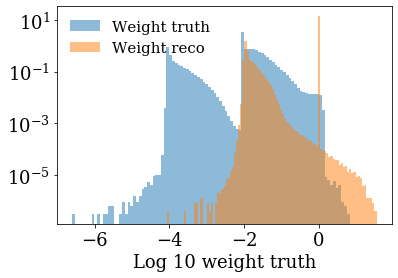

Iteration 0
1.2920359373092651 2.854581907740794e-06
1.459521770477295 0.010693017393350601
 
Iteration 1
6.61713171005249 2.480445857599989e-07
35.010597229003906 8.545087621314451e-05
 


In [29]:
plt.hist(np.log10(mc_cut['weight_truth']),bins=100,**plot_style_2,label='Weight truth')
plt.hist(np.log10(mc_cut['weight_reco']),bins=100,**plot_style_2, label='Weight reco')
plt.legend()
plt.xlabel('Log 10 weight truth')
plt.yscale('log')
plt.show()

for i in range(len(weights)):
    print ('Iteration %i'%i)
    print(max(weights[i, 1, :]), min(weights[i, 1, :]))    
    print(max(weights[i, 0, :]), min(weights[i, 0, :]))
    print(' ')

ITERATION: 1
ITERATION: 2


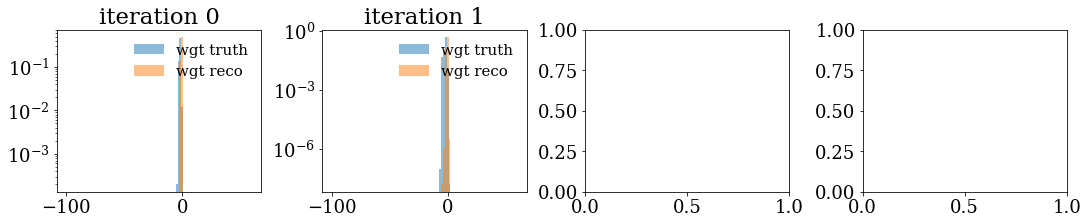

In [30]:
fig, ax = plt.subplots(1,
                           4,
                           figsize=(15, 3),
                           constrained_layout=True)
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    #bins = np.linspace(5, 50, 45)

    
    ax[i].hist(np.log10(weights[i, 1, :][~np.isnan(weights[i, 1, :])]),bins=100,range=(-100,60),**plot_style_2,label='wgt truth')
    ax[i].hist(np.log10(weights[i, 0, :][~np.isnan(weights[i, 0, :])]),bins=100,range=(-100,60),**plot_style_2, label='wgt reco') 
    ax[i].legend()
    ax[i].set_yscale('log')
    ax[i].set_title('iteration %i'%i)

    #ax[i].xlabel('Log 10 weight truth')

## Incorporate weights into the dataframe

## MC at reco level reweighted vs data

In [ ]:
query = 'pass_reco==1 '
print('The query is:' , query)
label1 = mc_name +' reco'
label2 = mc_name +' wgt.'
label3 = 'Data reco'

color1='blueviolet'
color2='limegreen'
for i in range(len(weights)):
    #if(i<2): continue

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    fig, ax = plt.subplots(1,
                           3,
                           figsize=(24, 6),
                           constrained_layout=True)
    bins = np.linspace(0.0, 1.0,40 )
    
    ax = ax.flatten()

    ax[0].set_xlabel(r'$y$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(mc_cut.query(query)['y'], weights=mc_cut.query(query)['wgt'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[0].hist(mc_cut.query(query)['y'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[0].hist(data_cut.query(query)['y'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    
    ax[0].legend(frameon=False,loc='best')

    bins = np.linspace(2, 4,25 )

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(mc_cut.query(query)['logQ2'], weights=mc_cut.query(query)['wgt'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[1].hist(mc_cut.query(query)['logQ2'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[1].hist(data_cut.query(query)['logQ2'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    
    ax[1].legend(frameon=False,loc='best')

    
#     bins = np.linspace(0,1,50 )

#     ax[2].set_xlabel('tau',fontsize=22)
#     ax[2].set_ylabel('Events per bin (Normalized)')
#     ax[2].hist(mc_cut.query(query)['tauzQ'], bins=bins, label=label1, **plot_style_2,color=color1)
#     ax[2].hist(mc_cut.query(query)['tauzQ'],
#                bins=bins,
#                weights=mc_cut.query(query)['weight_reco'],
#                label=label2,
#                **plot_style_1)

#     ax[2].hist(data_cut.query(query)['tauzQ'],
#                bins=bins,
#                label=label3,
#                **plot_style_2,color=color2)
#     #ax[0,2].set_yscale('log')
#     #ax[0,2].set_xscale('log')
#     ax[2].legend(frameon=False,loc='best')

    
   

## Plot unfolded results

In [ ]:
#event_selection = 'gen_y>0.2 and gen_y<0.7 and gen_Q2>150'
##track_selection = 'gen_track_pt>0.2'
#jet_selection    = 'gen_track_jetpt>15'
#query = 'pass_reco==1 and ' + event_selection + ' and ' + track_selection + ' and ' + jet_selection

query = 'pass_reco==1'
print('The query is:' , query)

label1 = r'Django truth'
label2 = r'Data unfolded.'
label3 = r'Data reco'

for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           3,
                           figsize=(24, 6),
                           constrained_layout=True)
    bins = np.linspace(0.0, 1.0,40 )

    ax = ax.flatten()
    ax[0].set_xlabel(r'$y$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(mc_cut.query(query)['gen_y'], bins=bins, label=label1, **plot_style_2)
    ax[0].hist(mc_cut.query(query)['gen_y'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[0].hist(data_cut.query(query)['y'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    ax[0].legend(frameon=False)

    bins = np.linspace(2, 4,25 )

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(mc_cut.query(query)['gen_logQ2'], bins=bins, label=label1, **plot_style_2)
    ax[1].hist(mc_cut.query(query)['gen_logQ2'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[1].hist(data_cut.query(query)['logQ2'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    

    
    bins = np.linspace(0,1,50 )

    ax[2].set_xlabel(r'$jet p_{T} $',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(mc_cut.query(query)['gen_tauzQ'], bins=bins, label=label1, **plot_style_2)
    ax[2].hist(mc_cut.query(query)['gen_tauzQ'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[2].hist(data_cut.query(query)['tauzQ'],
               bins=bins,
               label=label3,
               **plot_style_2)
    


## Jet pT spectrum data reco vs MC reco

In [ ]:
fig = plt.figure(figsize=(8,6))
query = 'pass_reco==1'
bins = np.linspace(0,1,40)
#bins = np.array([5,10,14,21,29,47,71,127])

#plt.set_xlabel(r'$ jet p_{T} $',fontsize=22)
#plt.set_ylabel('Events per bin (Normalized)')
plt.hist(mc_cut.query(query)['tauzQ'], bins=bins, label=mc_name+' reco', **plot_style_2,color=color1)
plt.hist(mc_cut.query(query)['tauzQ'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=mc_name +' reco weighted',
               **plot_style_1)

plt.hist(data_cut.query(query)['tauzQ'],
               bins=bins,
               label='Data reco',
               **plot_style_2,color=color2)
plt.legend()
plt.yscale('log')
plt.title(r'$Q^{2}>150$ GeV$^{2}, 0.08<y<0.7$')

plt.xlabel(r'$\tau$',fontsize=22)
plt.ylabel('Events per bin (Normalized)')
#plt.xscale('log')
plt.legend(frameon=False,loc='best')
#fig.savefig('figures/jetpt_reco.png'%i)  




## Data/MC agreement with differential 

In [ ]:
#bins = np.logspace(np.log10(0.01),np.log10(3),8)
bins = np.linspace(0,1,40)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(24,6), gridspec_kw={'wspace':0, 'hspace':0})

for counter,edges in enumerate([(12,20), (20,30),(30,100)]):
    #cut = ' Q2 > %2.2f and Q2 <%2.2f and pass_reco==1'%(edges[0],edges[1])
    cut = 'Q>%2.2f and Q<%2.2f and pass_reco==1'%(edges[0],edges[1])
    print (cut)
    print ('###########')

    axs[counter].xaxis.set_label_text(r'$\tau$', fontsize=25)


    
    axs[counter].hist(mc_cut.query(cut)['tauzQ'], bins=bins, label=mc_name+' reco', **plot_style_2,color=color1)
    axs[counter].hist(mc_cut.query(cut)['tauzQ'],
               bins=bins,
               weights=mc_cut.query(cut)['weight_reco'],
               label=mc_name +' reco wgt.',
               **plot_style_1)
    axs[counter].hist(data_cut.query(cut)['tauzQ'],
               bins=bins,
               label='Data reco',
               **plot_style_2,color=color2)    
    
    
    axs[counter].legend(prop={'size': 15}, frameon=False, loc='best')
    axs[counter].set_title(' $ %2.0f < Q < %2.0f$ GeV'%(edges[0],edges[1]))


    #axs[counter].text(1.5,2.9,  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(data_cut.query(cut)['x'].mean(), data_cut.query(cut)['Q2'].mean()), fontsize=18)
    axs[counter].set_yscale('log')
    #axs[counter].set_xscale('log')

 
axs[0].yaxis.set_label_text('Normalized entries', fontsize=25)



## Plot data, and unfolded results and MC truth

In [ ]:
fig = plt.figure(figsize=(8,6))

cut = ' gen_Q2 > 150 and gen_y>0.2 and gen_y<0.7'

#bins = np.logspace(np.log10(15),np.log10(100),8)
bins = np.linspace(0,1,40)

#plt.hist(data['jet_pt'],bins=bins,label='Data (reco)',**plot_style_2)
#num,x,_ = plt.hist(altmc_cut.query(cut)['genjet_pt'],bins=bins,label='Rapgap Truth',**plot_style_2)
plt.hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,weights=mc_cut.query(cut)['weight_truth'],label = 'Unfolded',**plot_style_1)
plt.hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,label = 'Django truth',**plot_style_2)
plt.hist(altmc_cut.query(cut)['gen_tauzQ'],bins=bins,label = 'Rapgap truth',**plot_style_2)


plt.legend()
plt.yscale('log')
#plt.xscale('log')

plt.show()

## Bootstrapping

In [ ]:
mc_cut = mc[:2000000]


In [ ]:
print(len(data_cut))
print(len(mc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(mc_cut)) ##only what is really reconstructed counts


In [ ]:
Q_0_G       = mc_cut['gen_Q']
Q_0_S       = mc_cut['Q']

y_0_G       = mc_cut['gen_y']
y_0_S       = mc_cut['y']

tauzQ_0_G       = mc_cut['gen_tauzQ']
tauzQ_0_S       = mc_cut['tauzQ']

In [ ]:
theta0_G=np.c_[(Q_0_G, y_0_G,tauzQ_0_G)]
theta0_S=np.c_[(Q_0_S, y_0_S,tauzQ_0_S)]
 

In [ ]:
pass_reco = np.array(mc_cut['pass_reco'])
pass_truth = np.array(mc_cut['pass_truth'])
theta0_S[:,0][pass_reco==0] = -10
theta0_G[:,0][pass_truth==0] = -10

In [ ]:
K.clear_session()

In [ ]:
bootstraps = 50
iterations =  5
nvariables = 8
weights = [] 

import timeit


for i in range(bootstraps):
    start = timeit.timeit()

    print ('%i th jackknifedata'%i)
    K.clear_session()
    ## define the data input for the unfolding
    #bootstrap_data = data_cut.sample(data_cut.shape[0], replace=True)
    #add Poisson variation of total number of data events used:
    bootstrap_data = data_cut.sample(np.random.poisson(data_cut.shape[0],1)[0], replace=True)
    
    Q_unknown_S         = bootstrap_data['Q']
    y_unknown_S         = bootstrap_data['y']
    tauzQ_unknown_S     = bootstrap_data['tauzQ']

    theta_unknown_S =np.c_[(Q_unknown_S, y_unknown_S, tauzQ_unknown_S)]

    
    
    num_observables = 3
    i_weight, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=theta0_G,
                       theta0_S=theta0_S,
                       theta_unknown_S= theta_unknown_S,
                       verbose =0
                      )
    
    
    
    weights.append(i_weight)
    end = timeit.timeit()
    print(end - start)


In [ ]:
print(len(weights))

## for k in range(bootstraps):
    for i in range(len(weights[k])):
        print (weights[k].shape)
        print((weights[k][i, 1, :]).shape)
        print((weights[k][i, 1, :]).shape)
        print((weights[k][i, 1:2, :][0]).shape)


In [ ]:
covariance_matrices = []
for it in range(5):
    myns = []
    #bins = np.logspace(np.log10(0.01),np.log10(80),6)
    #bins = np.logspace(np.log10(0.1),np.log10(np.pi),20)
    #bins = np.array([0.0, 2.05491515, 2.45354097, 2.63853135,
    #                 2.8145858,  2.98213597, 3.14159265])

    bins = np.linspace(0,1.0,7)
    #bins = np.logspace(np.log10(10),np.log10(100),5)
    cut = 'gen_Q2>150 and gen_y>0.2 and gen_y<0.7 and pass_reco==1'
    for k in range(len(weights)):
        mc_cut['weight_temp'] =weights[k][it, 1, :]

        n,b,_ = plt.hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,weights=mc_cut.query(cut)['weight_temp'],alpha=0.3)
        myns+=[n]
        pass
    myns = np.array(myns)
    #print(myns)
    #plt.xlabel('tau1b')

    cov = np.array([[np.mean((myns[:,j] - np.mean(myns[:,j]))*(myns[:,i] - np.mean(myns[:,i]))) for i in range(len(myns[0]))] for j in range(len(myns[0]))])
    corr = np.array([[cov[i,j]/(np.sqrt(cov[i,i])*np.sqrt(cov[j,j])) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

    covariance_matrices.append(corr)
    #fig, ax = plt.subplots() 
    #im = ax.imshow(corr,cmap='RdBu', vmin=0.0, vmax=1.0,
    #                         interpolation='none')
    #fig.colorbar(im,ax=ax)

print(covariance_matrices[0])
plt.show()

#print (len(myns))
#print (len(myns[0]))

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(12,12)) 
minimo =-.40
maximo = 1.0

ax = ax.flatten()

im = ax[0].imshow(covariance_matrices[0],cmap='RdBu', vmin=minimo, vmax=1.0,
                             interpolation='none')
im = ax[1].imshow(covariance_matrices[1],cmap='RdBu', vmin=minimo, vmax=1.0,
                             interpolation='none')
im = ax[2].imshow(covariance_matrices[2],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')
im = ax[3].imshow(covariance_matrices[3],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')
im = ax[4].imshow(covariance_matrices[4],cmap='RdBu', vmin=minimo, vmax =1.0,
                  interpolation='none')
#im = ax[6].imshow(covariance_matrices[5],cmap='RdBu', vmin=minimo, vmax=1.0,
#                  interpolation='none')


ax[0].set_title('iteration #1')
ax[1].set_title('iteration #2')
ax[2].set_title('iteration #3')
ax[3].set_title('iteration #4')
ax[4].set_title('iteration #5')
ax[5].set_title('iteration #6')


plt.colorbar(im,ax=ax)
plt.show()

In [ ]:
from numpy.linalg import inv
x = [] 
rhos= []
for it in range(4): #iterations
    temp = []
    cov = np.matrix(covariance_matrices[it])
    inversecov = inv(cov)
    for i in range(cov.shape[0]):
         if(cov[i,i]*inversecov[i,i]!=0):
            temp.append( np.sqrt(1- 1.0/(cov[i,i]*inversecov[i,i])))
    rho_it = np.average(temp)
    rhos.append(rho_it)
    x.append(it+1)
    print (rho_it)
print (x)
print (rhos)

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(x,rhos,'-o')
plt.xlabel('Number of Multifold iterations',fontsize=20)
plt.ylabel('Mean global-correlation coefficient',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [ ]:
cov = np.array([[np.mean((myns[:,j] - np.mean(myns[:,j]))*(myns[:,i] - np.mean(myns[:,i]))) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

In [ ]:
corr = np.array([[cov[i,j]/(np.sqrt(cov[i,i])*np.sqrt(cov[j,j])) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

In [ ]:
fig, ax = plt.subplots() 
im = ax.imshow(corr,cmap='RdBu', vmin=0.0, vmax=1.0,
                             interpolation='none')
fig.colorbar(im,ax=ax)
plt.show()